In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem.Draw import MolsToGridImage

In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
vanilla_mols_df = df.loc[df['vanilla'] == 1]
vanilla_mols_df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
26,COc1ccccc1O,medicinal;savory;phenolic;woody;smoky;vanilla;...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
32,O=C1CCc2ccccc2O1,herbal;nutty;vanilla;coumarinic;hay;tobacco;sw...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
64,COc1cc(C=O)ccc1O,chocolate;vanilla;creamy;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
67,COc1cc(C(C)=O)ccc1O,vanilla;sweet,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [79]:
vanillin_smiles = ["COc1cc(C=O)ccc1O"]

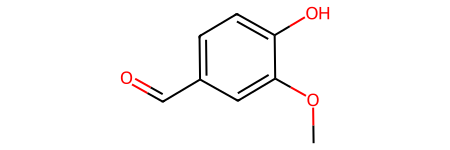

In [80]:
vanilla_mol = Chem.MolFromSmiles(vanillin_smiles[0])
vanilla_mol

In [81]:
def extract_fragments(mol):
    fragments = Chem.GetMolFrags(mol, asMols=True)
    return fragments

In [82]:
fragments = extract_fragments(vanilla_mol)
unique_fragments = set()
for frag in fragments:
    smiles = Chem.MolToSmiles(frag)
    unique_fragments.add(smiles)
unique_fragments


{'COc1cc(C=O)ccc1O'}

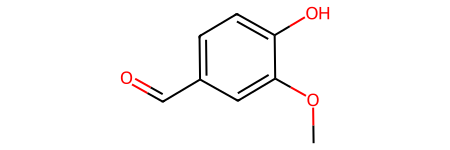

In [83]:
Chem.MolFromSmiles(list(unique_fragments)[0])

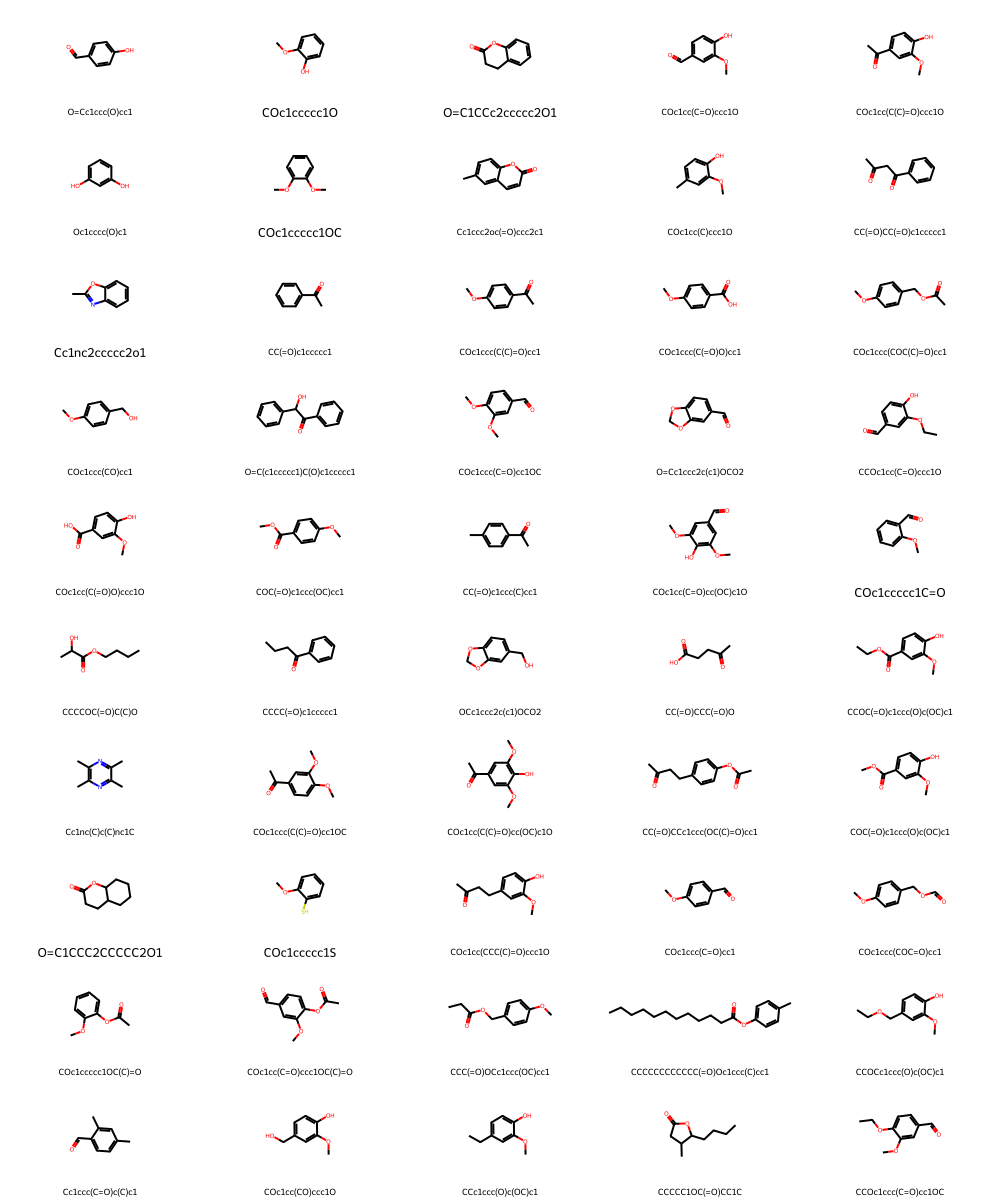

In [84]:
len(vanilla_mols_df)
import numpy as np
11**2
mols = [Chem.MolFromSmiles(smiles) for smiles in vanilla_mols_df["nonStereoSMILES"]] + [Chem.MolFromSmiles("") for smiles in range(10)]
labels = list(vanilla_mols_df["nonStereoSMILES"])+ [" " for smiles in range(10)]
MolsToGridImage(mols[:50], molsPerRow=5, subImgSize=(200, 120), legends=labels[:50])


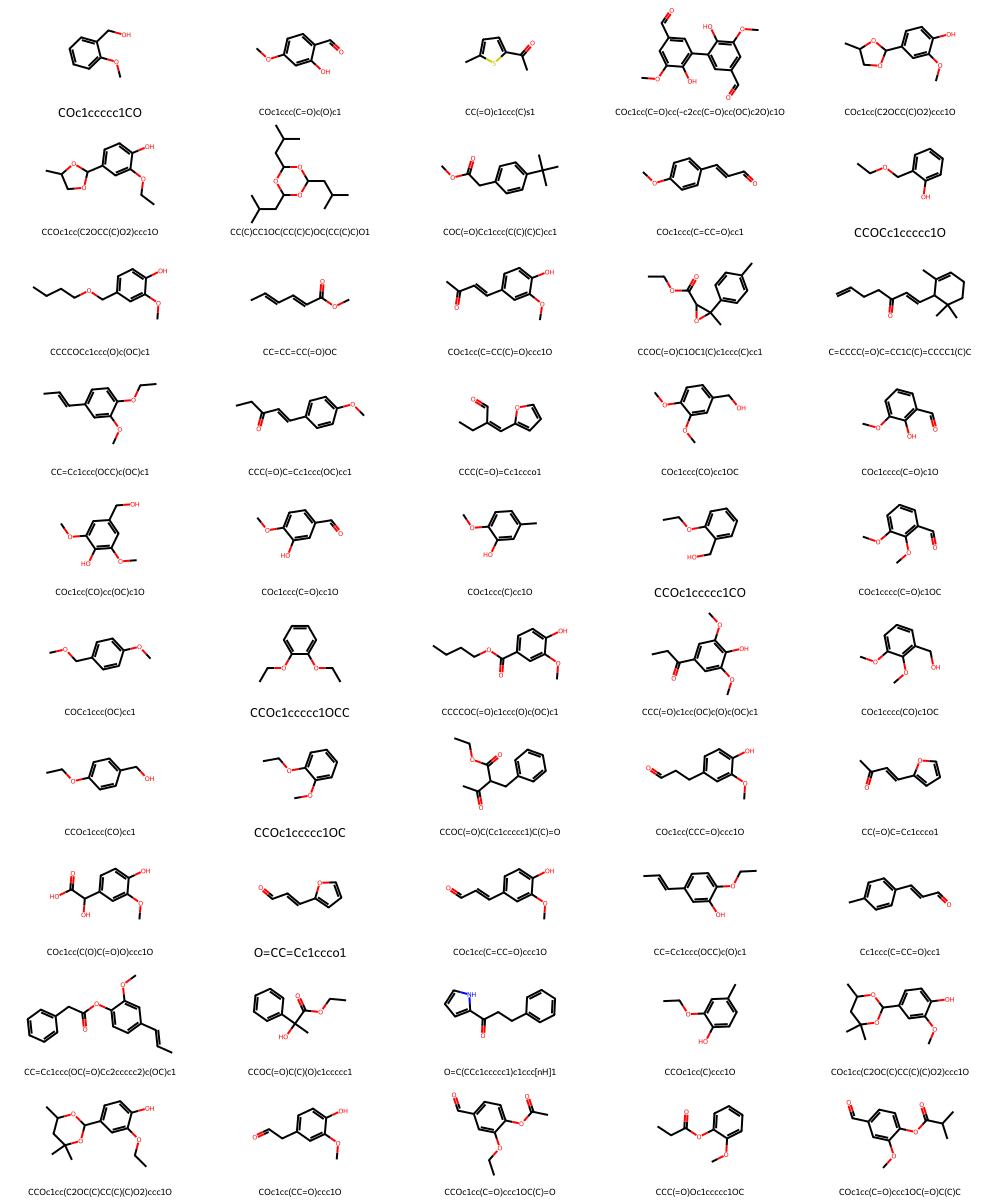

In [85]:
MolsToGridImage(mols[50:100], molsPerRow=5, subImgSize=(200, 120), legends=labels[50:100])

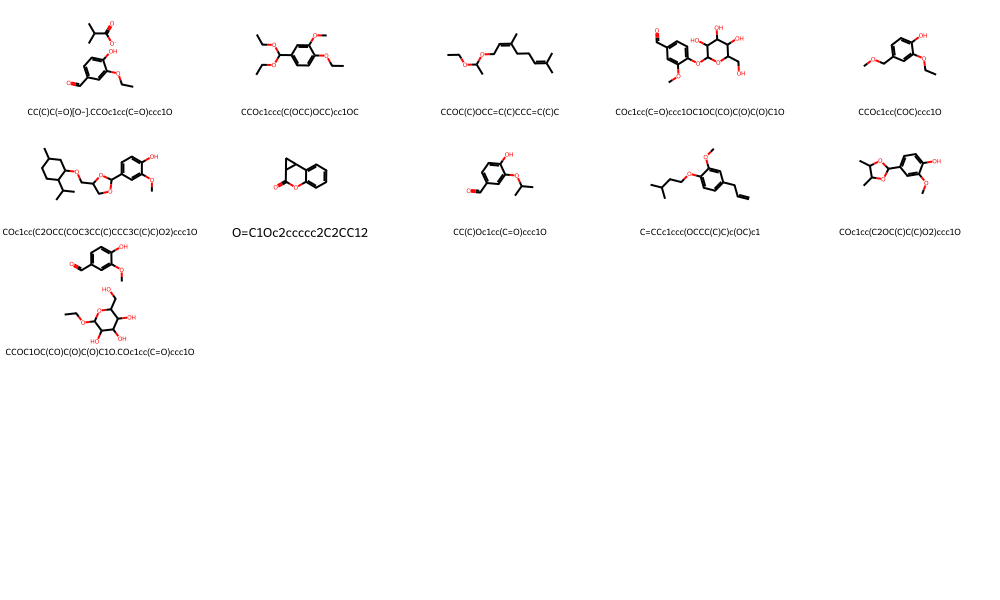

In [86]:
MolsToGridImage(mols[100:], molsPerRow=5, subImgSize=(200, 120), legends=labels[100:])

In [87]:
[1,2,3]+ [4,5,6]

[1, 2, 3, 4, 5, 6]

In [88]:
FRAGMENTS: list[tuple[str, list[int]]] = [
    ("Br", [0]),
    ("C", [0]),
    ("C#N", [0]),
    ("C1=CCCCC1", [0, 2, 3]),
    ("C1=CNC=CC1", [0, 2]),
    ("C1CC1", [0]),
    ("C1CCCC1", [0]),
    ("C1CCCCC1", [0, 1, 2, 3, 4, 5]),
    ("C1CCNC1", [0, 2, 3, 4]),
    ("C1CCNCC1", [0, 1, 3]),
    ("C1CCOC1", [0, 1, 2, 4]),
    ("C1CCOCC1", [0, 1, 2, 4, 5]),
    ("C1CNCCN1", [2, 5]),
    ("C1COCCN1", [5]),
    ("C1COCC[NH2+]1", [5]),
    ("C=C", [0, 1]),
    ("C=C(C)C", [0]),
    ("C=CC", [0, 1]),
    ("C=N", [0]),
    ("C=O", [0]),
    ("CC", [0, 1]),
    ("CC(C)C", [1]),
    ("CC(C)O", [1]),
    ("CC(N)=O", [2]),
    ("CC=O", [1]),
    ("CCC", [1]),
    ("CCO", [1]),
    ("CN", [0, 1]),
    ("CNC", [1]),
    ("CNC(C)=O", [0]),
    ("CNC=O", [0, 2]),
    ("CO", [0, 1]),
    ("CS", [0]),
    ("C[NH3+]", [0]),
    ("C[SH2+]", [1]),
    ("Cl", [0]),
    ("F", [0]),
    ("FC(F)F", [1]),
    ("I", [0]),
    ("N", [0]),
    ("N=CN", [1]),
    ("NC=O", [0, 1]),
    ("N[SH](=O)=O", [1]),
    ("O", [0]),
    ("O=CNO", [1]),
    ("O=CO", [1]),
    ("O=C[O-]", [1]),
    ("O=PO", [1]),
    ("O=P[O-]", [1]),
    ("O=S=O", [1]),
    ("O=[NH+][O-]", [1]),
    ("O=[PH](O)O", [1]),
    ("O=[PH]([O-])O", [1]),
    ("O=[SH](=O)O", [1]),
    ("O=[SH](=O)[O-]", [1]),
    ("O=c1[nH]cnc2[nH]cnc12", [3, 6]),
    ("O=c1[nH]cnc2c1NCCN2", [8, 3]),
    ("O=c1cc[nH]c(=O)[nH]1", [2, 4]),
    ("O=c1nc2[nH]c3ccccc3nc-2c(=O)[nH]1", [8, 4, 7]),
    ("O=c1nccc[nH]1", [3, 6]),
    ("S", [0]),
    ("c1cc[nH+]cc1", [1, 3]),
    ("c1cc[nH]c1", [0, 2]),
    ("c1ccc2[nH]ccc2c1", [6]),
    ("c1ccc2ccccc2c1", [0, 2]),
    ("c1ccccc1", [0, 1, 2, 3, 4, 5]),
    ("c1ccncc1", [0, 1, 2, 4, 5]),
    ("c1ccsc1", [2, 4]),
    ("c1cn[nH]c1", [0, 1, 3, 4]),
    ("c1cncnc1", [0, 1, 3, 5]),
    ("c1cscn1", [0, 3]),
    ("c1ncc2nc[nH]c2n1", [2, 6]),
]

In [89]:
len(FRAGMENTS)

72

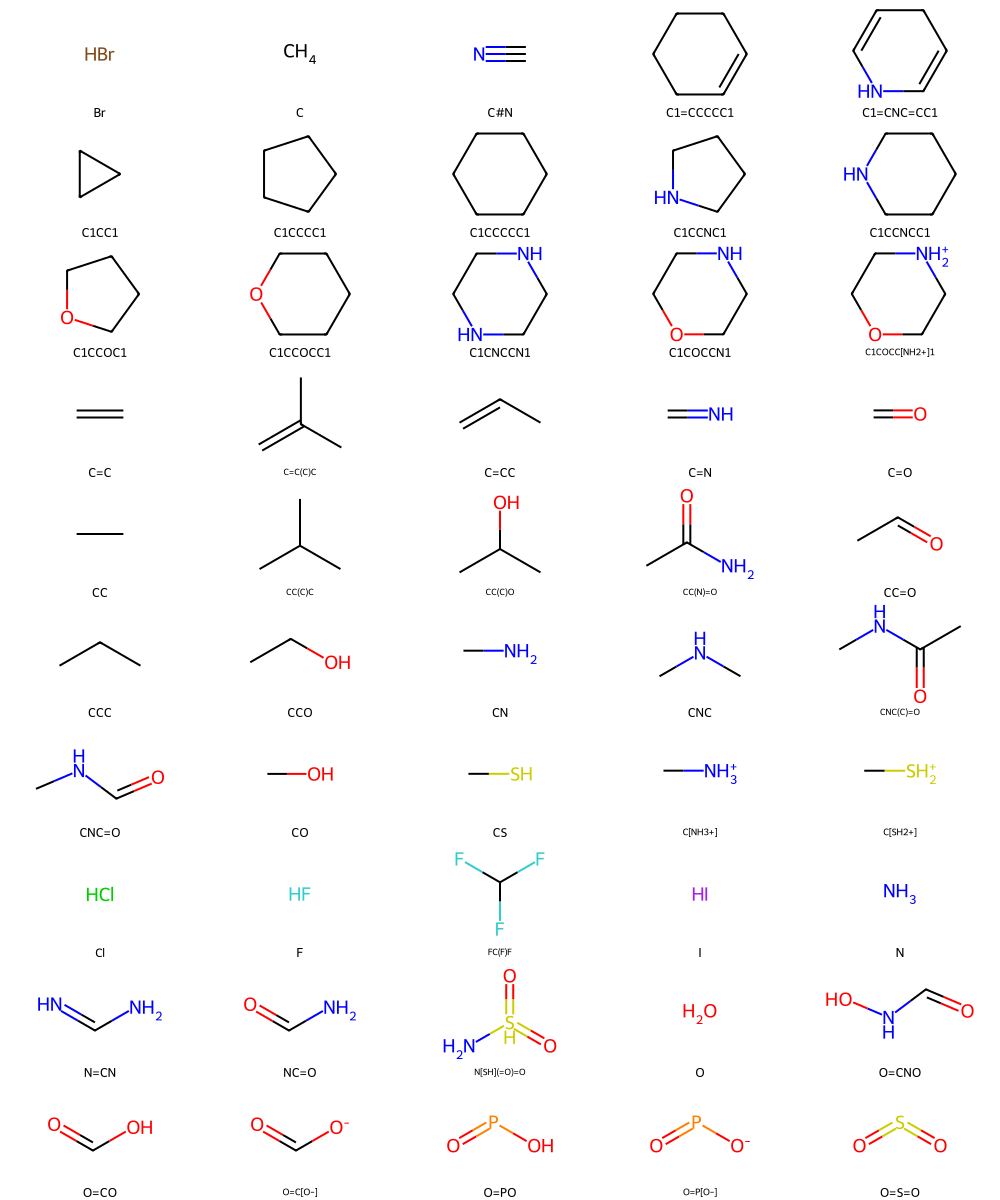

In [90]:

frags = [Chem.MolFromSmiles(smiles[0]) for smiles in FRAGMENTS] 
frag_labels = [smiles[0] for smiles in FRAGMENTS] 

MolsToGridImage(frags[:50], molsPerRow=5, subImgSize=(200, 120),legends=frag_labels[:50])

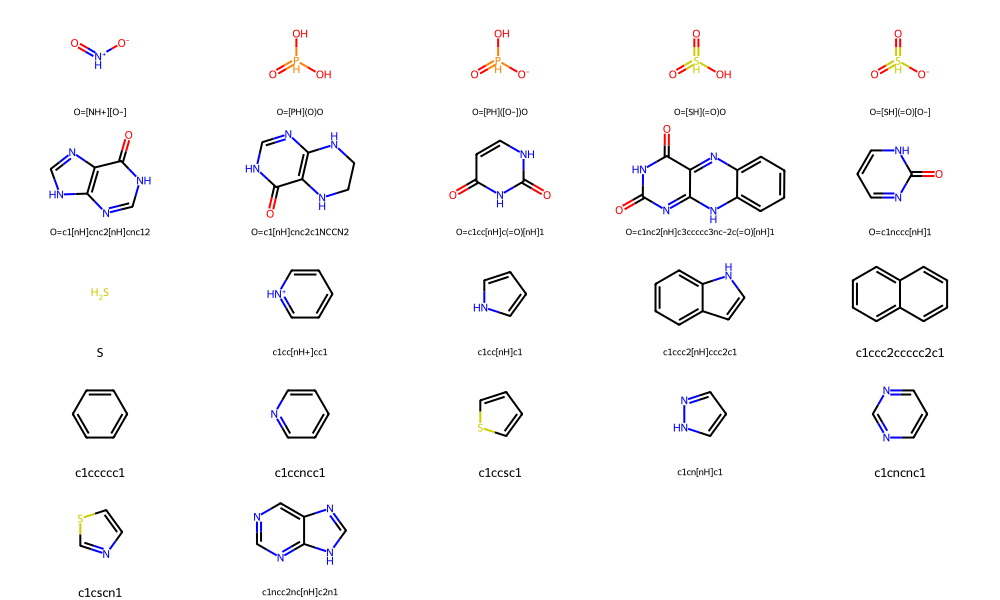

In [91]:
MolsToGridImage(frags[50:], molsPerRow=5, subImgSize=(200, 120),legends=frag_labels[50:])

In [92]:
len(FRAGMENTS),len(vanilla_mols_df)

(72, 111)

In [93]:
contained_frags = set()
for vanilla_smiles in vanilla_mols_df["nonStereoSMILES"]:
    vanilla_mol = Chem.MolFromSmiles(vanilla_smiles)
    for frag_smiles in FRAGMENTS:
        #print(frag_smiles[])
        frag_mol = Chem.MolFromSmiles(frag_smiles[0])

        if vanilla_mol.HasSubstructMatch(frag_mol):
            contained_frags.add(frag_smiles[0])

len(contained_frags)
contained_frag_and_indexes = []
for frag in FRAGMENTS:
    for relevant_frag in contained_frags:
        if relevant_frag == frag[0]:
            contained_frag_and_indexes.append(frag)
len(contained_frags), len(contained_frag_and_indexes)

(26, 26)

In [94]:
contained_frag_and_indexes

[('C', [0]),
 ('C1=CCCCC1', [0, 2, 3]),
 ('C1CC1', [0]),
 ('C1CCCCC1', [0, 1, 2, 3, 4, 5]),
 ('C1CCOC1', [0, 1, 2, 4]),
 ('C1CCOCC1', [0, 1, 2, 4, 5]),
 ('C=C', [0, 1]),
 ('C=C(C)C', [0]),
 ('C=CC', [0, 1]),
 ('C=O', [0]),
 ('CC', [0, 1]),
 ('CC(C)C', [1]),
 ('CC(C)O', [1]),
 ('CC=O', [1]),
 ('CCC', [1]),
 ('CCO', [1]),
 ('CO', [0, 1]),
 ('CS', [0]),
 ('N', [0]),
 ('O', [0]),
 ('O=CO', [1]),
 ('O=C[O-]', [1]),
 ('S', [0]),
 ('c1cc[nH]c1', [0, 2]),
 ('c1ccccc1', [0, 1, 2, 3, 4, 5]),
 ('c1ccsc1', [2, 4])]

In [95]:
contained_frags

{'C',
 'C1=CCCCC1',
 'C1CC1',
 'C1CCCCC1',
 'C1CCOC1',
 'C1CCOCC1',
 'C=C',
 'C=C(C)C',
 'C=CC',
 'C=O',
 'CC',
 'CC(C)C',
 'CC(C)O',
 'CC=O',
 'CCC',
 'CCO',
 'CO',
 'CS',
 'N',
 'O',
 'O=CO',
 'O=C[O-]',
 'S',
 'c1cc[nH]c1',
 'c1ccccc1',
 'c1ccsc1'}

In [96]:
FRAGMENTS_VANILLA = [
    ('C', [0]),
    ('C1=CCCCC1', [0, 2, 3]),
    ('C1CC1', [0]),
    ('C1CCCCC1', [0, 1, 2, 3, 4, 5]),
    ('C1CCOC1', [0, 1, 2, 4]),
    ('C1CCOCC1', [0, 1, 2, 4, 5]),
    ('C=C', [0, 1]),
    ('C=C(C)C', [0]),
    ('C=CC', [0, 1]),
    ('C=O', [0]),
    ('CC', [0, 1]),
    ('CC(C)C', [1]),
    ('CC(C)O', [1]),
    ('CC=O', [1]),
    ('CCC', [1]),
    ('CCO', [1]),
    ('CO', [0, 1]),
    ('CS', [0]),
    ('N', [0]),
    ('O', [0]),
    ('O=CO', [1]),
    ('O=C[O-]', [1]),
    ('S', [0]),
    ('c1cc[nH]c1', [0, 2]),
    ('c1ccccc1', [0, 1, 2, 3, 4, 5]),
    ('c1ccsc1', [2, 4])
    ]

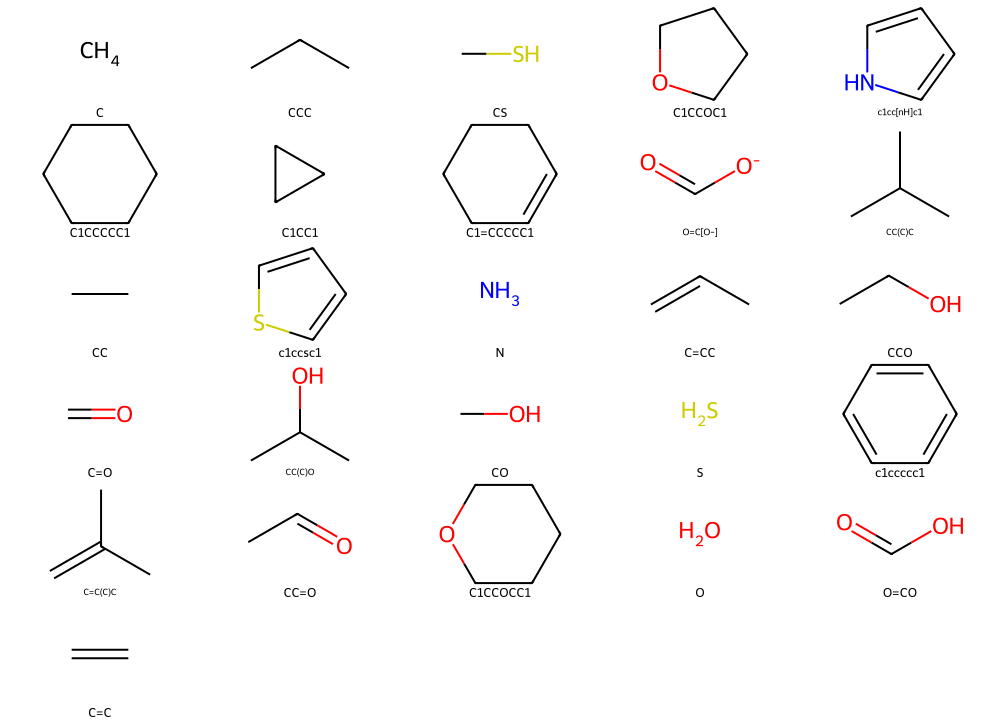

In [97]:
contained_frags_mols = [Chem.MolFromSmiles(smiles) for smiles in contained_frags] 


MolsToGridImage(contained_frags_mols, molsPerRow=5, subImgSize=(200, 120),legends=contained_frags)

In [98]:
df.head()

,nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [99]:
contained_frags = set()
for dataset_smiles in df["nonStereoSMILES"]:
    dataset_mol = Chem.MolFromSmiles(dataset_smiles)
    for frag_smiles in FRAGMENTS:
        #print(frag_smiles[])
        frag_mol = Chem.MolFromSmiles(frag_smiles[0])

        if dataset_mol.HasSubstructMatch(frag_mol):
            contained_frags.add(frag_smiles[0])

len(contained_frags)
contained_frag_and_indexes = []
for frag in FRAGMENTS:
    for relevant_frag in contained_frags:
        if relevant_frag == frag[0]:
            contained_frag_and_indexes.append(frag)
len(contained_frags), len(contained_frag_and_indexes)

(65, 65)

In [100]:
contained_frag_and_indexes

[('Br', [0]),
 ('C', [0]),
 ('C#N', [0]),
 ('C1=CCCCC1', [0, 2, 3]),
 ('C1CC1', [0]),
 ('C1CCCC1', [0]),
 ('C1CCCCC1', [0, 1, 2, 3, 4, 5]),
 ('C1CCNC1', [0, 2, 3, 4]),
 ('C1CCNCC1', [0, 1, 3]),
 ('C1CCOC1', [0, 1, 2, 4]),
 ('C1CCOCC1', [0, 1, 2, 4, 5]),
 ('C1CNCCN1', [2, 5]),
 ('C=C', [0, 1]),
 ('C=C(C)C', [0]),
 ('C=CC', [0, 1]),
 ('C=N', [0]),
 ('C=O', [0]),
 ('CC', [0, 1]),
 ('CC(C)C', [1]),
 ('CC(C)O', [1]),
 ('CC(N)=O', [2]),
 ('CC=O', [1]),
 ('CCC', [1]),
 ('CCO', [1]),
 ('CN', [0, 1]),
 ('CNC', [1]),
 ('CNC(C)=O', [0]),
 ('CNC=O', [0, 2]),
 ('CO', [0, 1]),
 ('CS', [0]),
 ('C[NH3+]', [0]),
 ('C[SH2+]', [1]),
 ('Cl', [0]),
 ('F', [0]),
 ('I', [0]),
 ('N', [0]),
 ('N=CN', [1]),
 ('NC=O', [0, 1]),
 ('N[SH](=O)=O', [1]),
 ('O', [0]),
 ('O=CO', [1]),
 ('O=C[O-]', [1]),
 ('O=PO', [1]),
 ('O=P[O-]', [1]),
 ('O=S=O', [1]),
 ('O=[NH+][O-]', [1]),
 ('O=[PH](O)O', [1]),
 ('O=[PH]([O-])O', [1]),
 ('O=[SH](=O)O', [1]),
 ('O=[SH](=O)[O-]', [1]),
 ('O=c1[nH]cnc2[nH]cnc12', [3, 6]),
 ('O=c1[nH]c

In [101]:
DATASET_FRAGMENTS = [
    ('Br', [0]),
    ('C', [0]),
    ('C#N', [0]),
    ('C1=CCCCC1', [0, 2, 3]),
    ('C1CC1', [0]),
    ('C1CCCC1', [0]),
    ('C1CCCCC1', [0, 1, 2, 3, 4, 5]),
    ('C1CCNC1', [0, 2, 3, 4]),
    ('C1CCNCC1', [0, 1, 3]),
    ('C1CCOC1', [0, 1, 2, 4]),
    ('C1CCOCC1', [0, 1, 2, 4, 5]),
    ('C1CNCCN1', [2, 5]),
    ('C=C', [0, 1]),
    ('C=C(C)C', [0]),
    ('C=CC', [0, 1]),
    ('C=N', [0]),
    ('C=O', [0]),
    ('CC', [0, 1]),
    ('CC(C)C', [1]),
    ('CC(C)O', [1]),
    ('CC(N)=O', [2]),
    ('CC=O', [1]),
    ('CCC', [1]),
    ('CCO', [1]),
    ('CN', [0, 1]),
    ('CNC', [1]),
    ('CNC(C)=O', [0]),
    ('CNC=O', [0, 2]),
    ('CO', [0, 1]),
    ('CS', [0]),
    ('C[NH3+]', [0]),
    ('C[SH2+]', [1]),
    ('Cl', [0]),
    ('F', [0]),
    ('I', [0]),
    ('N', [0]),
    ('N=CN', [1]),
    ('NC=O', [0, 1]),
    ('N[SH](=O)=O', [1]),
    ('O', [0]),
    ('O=CO', [1]),
    ('O=C[O-]', [1]),
    ('O=PO', [1]),
    ('O=P[O-]', [1]),
    ('O=S=O', [1]),
    ('O=[NH+][O-]', [1]),
    ('O=[PH](O)O', [1]),
    ('O=[PH]([O-])O', [1]),
    ('O=[SH](=O)O', [1]),
    ('O=[SH](=O)[O-]', [1]),
    ('O=c1[nH]cnc2[nH]cnc12', [3, 6]),
    ('O=c1[nH]cnc2c1NCCN2', [8, 3]),
    ('O=c1cc[nH]c(=O)[nH]1', [2, 4]),
    ('O=c1nccc[nH]1', [3, 6]),
    ('S', [0]),
    ('c1cc[nH]c1', [0, 2]),
    ('c1ccc2[nH]ccc2c1', [6]),
    ('c1ccc2ccccc2c1', [0, 2]),
    ('c1ccccc1', [0, 1, 2, 3, 4, 5]),
    ('c1ccncc1', [0, 1, 2, 4, 5]),
    ('c1ccsc1', [2, 4]),
    ('c1cn[nH]c1', [0, 1, 3, 4]),
    ('c1cncnc1', [0, 1, 3, 5]),
    ('c1cscn1', [0, 3]),
    ('c1ncc2nc[nH]c2n1', [2, 6])
    ]

Desired mean = 13

In [102]:
total_num_atoms = 0
for frag in FRAGMENTS:
    frag_smile = frag[0]
    frag_mol = Chem.MolFromSmiles(frag_smile)
    total_num_atoms += frag_mol.GetNumAtoms()
mean_num_atoms = total_num_atoms/len(FRAGMENTS)
mean_num_atoms,total_num_atoms

(4.305555555555555, 310)

In [103]:
mean_num_atoms*3

12.916666666666666

In [105]:
total_num_atoms = 0
for frag in FRAGMENTS_VANILLA:
    frag_smile = frag[0]
    frag_mol = Chem.MolFromSmiles(frag_smile)
    total_num_atoms += frag_mol.GetNumAtoms()
mean_num_atoms = total_num_atoms/len(FRAGMENTS_VANILLA)
mean_num_atoms,total_num_atoms

(3.3076923076923075, 86)

In [109]:
mean_num_atoms*4

13.23076923076923

In [110]:
total_num_atoms = 0
for frag in DATASET_FRAGMENTS:
    frag_smile = frag[0]
    frag_mol = Chem.MolFromSmiles(frag_smile)
    total_num_atoms += frag_mol.GetNumAtoms()
mean_num_atoms = total_num_atoms/len(DATASET_FRAGMENTS)
mean_num_atoms,total_num_atoms

(4.030769230769231, 262)

In [112]:
mean_num_atoms*3

12.092307692307692

In [7]:
def carbon_content(mol):   
    atoms = mol.GetAtoms()
    num_atoms = mol.GetNumAtoms()
    # Initialize the counter for carbon atoms
    carbon_count = 0

    # Iterate over all atoms in the molecule and check if the atom is carbon
    for atom in atoms:
        if atom.GetSymbol() == 'C':  # 'C' is the symbol for carbon
            carbon_count += 1
    carbon_content = carbon_count/num_atoms

    return carbon_content 

In [10]:
c_cont=[]
for smiles in vanilla_mols_df["nonStereoSMILES"]:
    mol = Chem.MolFromSmiles(smiles)
    c_cont.append(carbon_content(mol))
min(c_cont),max(c_cont)

(0.625, 0.9411764705882353)